In [17]:
import numpy as np
import pandas as pd
import geoip2.database
import geoip2.errors
import sys
from socket import inet_ntoa
from struct import pack
from maxminddb import Reader
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from os import listdir

LABELED_PACKET_PATH = 'labeled_packets'
GEOIP_DB_PATH = '../geoip2db/GeoLite2-ASN.mmdb'

In [18]:
!ls labeled_packets

2018-05-09-192.168.100.103.pcap_part.parq
2018-05-21_capture.pcap_part.parq
2018-07-20-17-31-20-192.168.100.108.pcap_part1.parq
2018-07-20-17-31-20-192.168.100.108.pcap_part.parq
2018-07-25-10-53-16-192.168.100.111.pcap_part.parq
2018-07-31-15-15-09-192.168.100.113.pcap_part.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part10.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part11.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part12.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part13.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part14.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part15.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part16.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part1.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part2.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part3.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part4.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part5.parq
2018-09-06-11-43-12-192.168.100.111.pcap_part6.parq
2018-09-06-11-43-12-192.168.100.111.

In [38]:
def read_file(fileno):
    """ 
    Reads from Parquet file into a Pandas dataframe.

    Parameters:
        <int> fileno: 
            Index number of file within the directory list.

    Output:
        <pandas.dataframe> packet_df: 
            Dataframe of packets read from Parquet file at designated index. 
    """
    print("Reading file from path:", LABELED_PACKET_PATH) 

    # get directory listing
    directory = listdir(LABELED_PACKET_PATH)
    num_files = len(directory)
    print('Number of files:', num_files)
    random = np.random.randint(num_files, size=fileno)
    output_df = pd.DataFrame()

    # build dataset out of selected files in the directory
    # for 2209, all parquet files are from the same day within 18 hour window
    for entry in range(num_files): 
        target_path = LABELED_PACKET_PATH + '/' + directory[entry] 
        packet_df = pd.read_parquet(target_path)
        print('Read file:', target_path)
        output_df = pd.concat([output_df, packet_df], axis=0, copy=False)
        sys.stdout.flush()
    output_df = output_df.reset_index(drop=True)

    print('')
    sys.stdout.flush()

    return output_df 

In [39]:
df = read_file(4)


Reading file from path: labeled_packets
Number of files: 137
Read file: labeled_packets/2019-01-10-21-06-26-192.168.1.199.pcap_part2.parq
Read file: labeled_packets/2018-12-21-15-33-59-192.168.1.196.pcap_part7.parq
Read file: labeled_packets/2019-01-10-19-22-51-192.168.1.198.pcap_part3.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part27.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part41.parq
Read file: labeled_packets/2019-03-08-13-24-30-192.168.1.197.pcap_part6.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part44.parq
Read file: labeled_packets/2019-03-08-13-24-30-192.168.1.197.pcap_part4.parq
Read file: labeled_packets/2018-12-21-15-33-59-192.168.1.196.pcap_part1.parq
Read file: labeled_packets/2019-03-08-13-24-30-192.168.1.197.pcap_part2.parq
Read file: labeled_packets/2019-03-08-13-24-30-192.168.1.197.pcap_part5.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part38.parq
Read file: 

Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part14.parq
Read file: labeled_packets/2019-01-09-21-25-11-192.168.1.194.pcap_part4.parq
Read file: labeled_packets/2019-01-10-19-22-51-192.168.1.198.pcap_part11.parq
Read file: labeled_packets/2018-07-20-17-31-20-192.168.100.108.pcap_part.parq
Read file: labeled_packets/2019-01-10-19-22-51-192.168.1.198.pcap_part10.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part29.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part43.parq
Read file: labeled_packets/2018-10-02-13-12-30-192.168.100.103.pcap_part.parq
Read file: labeled_packets/2018-12-20-21-10-00-192.168.1.197.pcap_part3.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part25.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_part35.parq
Read file: labeled_packets/2019-01-09-21-25-11-192.168.1.194.pcap_part3.parq
Read file: labeled_packets/2019-09-20-02-40-32-192.168.1.195.pcap_p

In [40]:
df.head(20)

,timestamp,ip_protocol,ip_len,is_originator,ip_src,ip_dst,ip_ttl,port_src,port_dst,tcp_seq,tcp_ack,tcp_win_size,tcp_flags,is_malicious,malware_name,malware_behavior
0,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
1,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
2,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
3,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
4,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
5,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
6,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
7,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
8,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2
9,1.547157e+09,17,1365,1,3232235975,1451792184,64,38897,80,0,0,0,0,1,5,2


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742507457 entries, 0 to 742507456
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   ip_protocol       uint8  
 2   ip_len            uint16 
 3   is_originator     uint8  
 4   ip_src            uint32 
 5   ip_dst            uint32 
 6   ip_ttl            uint8  
 7   port_src          uint16 
 8   port_dst          uint16 
 9   tcp_seq           uint32 
 10  tcp_ack           uint32 
 11  tcp_win_size      uint32 
 12  tcp_flags         uint16 
 13  is_malicious      uint8  
 14  malware_name      uint8  
 15  malware_behavior  uint8  
dtypes: float64(1), uint16(4), uint32(5), uint8(6)
memory usage: 29.0 GB


In [41]:
df['is_malicious'].value_counts()

1    686158782
0     56348675
Name: is_malicious, dtype: int64

In [42]:
df['malware_name'].value_counts()

9     271138262
5     200095349
2     163835811
7      73676226
6      13662813
10     11428044
12      6427839
1       1631851
4        489567
3         82270
8         22748
11        16677
Name: malware_name, dtype: int64

In [43]:
df['malware_behavior'].value_counts()

2     323727130
7     282938754
6      74664861
0      56348675
1       4339585
11       268255
10        95479
14        70384
9         21616
15        10642
13         8840
3          8613
12         3102
18         1472
16           30
17           19
Name: malware_behavior, dtype: int64

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'ip_protocol'}>,
        <Axes: title={'center': 'ip_len'}>,
        <Axes: title={'center': 'is_originator'}>],
       [<Axes: title={'center': 'ip_src'}>,
        <Axes: title={'center': 'ip_dst'}>,
        <Axes: title={'center': 'ip_ttl'}>,
        <Axes: title={'center': 'port_src'}>],
       [<Axes: title={'center': 'port_dst'}>,
        <Axes: title={'center': 'tcp_seq'}>,
        <Axes: title={'center': 'tcp_ack'}>,
        <Axes: title={'center': 'tcp_win_size'}>],
       [<Axes: title={'center': 'tcp_flags'}>,
        <Axes: title={'center': 'is_malicious'}>,
        <Axes: title={'center': 'malware_name'}>,
        <Axes: title={'center': 'malware_behavior'}>]], dtype=object)

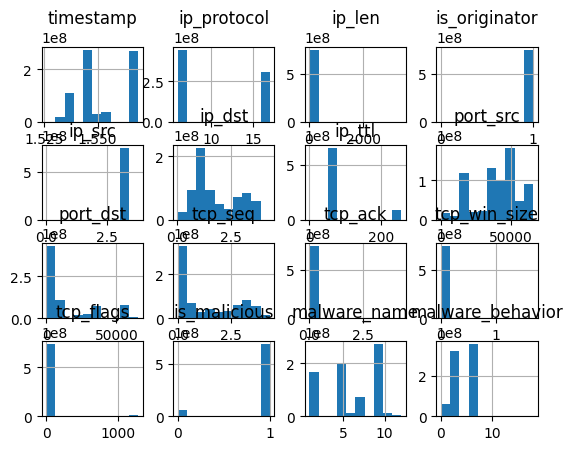

In [44]:
df.hist()

In [64]:
df.corr()

,timestamp,ip_protocol,ip_len,is_originator,ip_src,ip_dst,ip_ttl,port_src,port_dst,tcp_seq,tcp_ack,tcp_win_size,tcp_flags,is_malicious,malware_name,malware_behavior
timestamp,1.000000,0.845128,-0.057211,0.035719,0.024265,-0.407920,-0.195260,0.551419,-0.358593,-0.657340,-0.039060,-0.595471,-0.001901,0.005393,0.791577,-0.599200
ip_protocol,0.845128,1.000000,0.005979,0.016874,0.012643,-0.434380,-0.318068,0.357877,-0.313736,-0.774205,-0.024519,-0.795949,-0.106995,0.055099,0.708831,-0.726393
ip_len,-0.057211,0.005979,1.000000,-0.046203,-0.032861,0.025152,-0.008326,-0.030350,0.028562,-0.005419,0.035870,-0.010818,-0.003087,-0.012443,-0.046436,-0.016969
is_originator,0.035719,0.016874,-0.046203,1.000000,0.650810,-0.037622,0.003286,0.064227,-0.041537,-0.009481,-0.590580,0.012140,-0.000693,0.014878,0.020180,-0.024331
ip_src,0.024265,0.012643,-0.032861,0.650810,1.000000,-0.025543,0.005182,0.041771,-0.026326,-0.006692,-0.406915,0.006330,0.000115,0.008366,0.013370,-0.020005
ip_dst,-0.407920,-0.434380,0.025152,-0.037622,-0.025543,1.000000,0.076373,-0.223256,0.132423,0.707629,0.030011,0.272846,0.058654,-0.066640,-0.392567,0.290833
ip_ttl,-0.195260,-0.318068,-0.008326,0.003286,0.005182,0.076373,1.000000,0.089413,-0.207059,0.233773,-0.007120,0.565969,0.316962,0.109113,0.140981,0.301461
port_src,0.551419,0.357877,-0.030350,0.064227,0.041771,-0.223256,0.089413,1.000000,-0.436767,-0.307430,-0.032928,-0.043146,-0.061439,-0.034359,0.431513,-0.186753
port_dst,-0.358593,-0.313736,0.028562,-0.041537,-0.026326,0.132423,-0.207059,-0.436767,1.000000,0.202335,0.018620,0.067938,0.062824,0.108323,-0.369500,0.177398
tcp_seq,-0.657340,-0.774205,-0.005419,-0.009481,-0.006692,0.707629,0.233773,-0.307430,0.202335,1.000000,0.013522,0.584268,0.078921,-0.027046,-0.574558,0.575344


In [53]:
df['ip_protocol'].value_counts()

6     438895221
17    303612236
Name: ip_protocol, dtype: int64

transform to binary feature

In [54]:
df['is_originator'].value_counts()

1    741979050
0       528407
Name: is_originator, dtype: int64

In [55]:
df['port_dst'].value_counts()

80       245384284
23        90553288
52869     78838543
22        77988859
37215     74648756
           ...    
12391            1
25904            1
24546            1
46129            1
688              1
Name: port_dst, Length: 65472, dtype: int64

In [56]:
df['ip_ttl'].value_counts()

64     647281318
255     94712837
49         71225
50         54088
47         47712
         ...    
83             1
177            1
153            1
189            1
176            1
Name: ip_ttl, Length: 161, dtype: int64

In [57]:
df['port_src'].value_counts()

47911    66030573
63420    39677562
60022    33431476
17576    27314282
18088    27311860
           ...   
30311         424
24287         423
17209         422
13550         419
17045         390
Name: port_src, Length: 65536, dtype: int64

In [58]:
df['tcp_ack'].value_counts()

0             741651966
3061015525         8054
2718095398         1990
993371695          1512
993371535          1503
                ...    
2332014110            1
3480200163            1
3295749746            1
2515685936            1
3525015276            1
Name: tcp_ack, Length: 426081, dtype: int64

Drop this and tcp_seq feature

In [59]:
df['tcp_flags'].value_counts()

2       423231543
0       307662865
1215      7031430
1279      3580404
16         378721
24         321730
258        100265
20          77824
17          40213
18          32851
58          28431
4           17136
25           4026
84              6
148             4
194             3
82              2
152             1
212             1
786             1
Name: tcp_flags, dtype: int64

TCP flags should be 6 bit values, max decimal value should be 63?

In [61]:
df['tcp_win_size'].value_counts()

0          303701982
65535       73563906
60580       39676916
29200       31413559
27008       27313391
             ...    
122496             1
128128             1
130944             1
133760             1
3450880            1
Name: tcp_win_size, Length: 1683, dtype: int64

In [62]:
df['ip_len'].value_counts()

40      399609151
29      237308365
60       31403443
93       30227697
28       19265674
          ...    
1137            1
181             1
578             1
155             1
1499            1
Name: ip_len, Length: 757, dtype: int64